In [2]:
# Here we are going to use Generative modelling to generate beautyful sounds of different sounds by frist making a 
# distribution using a bunch of smaples and then take a new sample from that Gaussian Distribution with a very 
# little Standard Deviation. First we are going to do that for images and then we will be doing that for sounds.   


In [3]:
# Let's take a mean of 8 words.
# Then do a 1D Convolution to get a sharpen sound. 


In [4]:
# Importing necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import librosa
from IPython.display import Audio
from IPython.display import display
import random
import soundfile as sf
import pyrubberband
import matplotlib.pyplot as plt
from scipy import signal


2022-03-01 09:46:30.881264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 09:46:30.881291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# Importing the audio.
ar, sr = librosa.load('data/system_4/roshan.wav')

print(ar.shape)
print(sr)

Audio(data=ar, rate=sr)


(313344,)
22050


In [6]:
intervals = librosa.effects.split(ar, top_db=18)
print(intervals)
print(len(intervals))

all_words = np.array([])

# Now here we need to also search for mean.
sum_word = np.array([])
sum_word = np.pad(sum_word, (0, 22500*1 - len(sum_word)))


# Creating arrays for each words
for i in range(len(intervals)):
    inst_interval = intervals[i]
    inst_audio = ar[inst_interval[0] : inst_interval[1]]
    
    # Only use this when you are saving audio clips.
    sf.write('data/system_4/word_1/{}.wav'.format(i), inst_audio, sr, 'PCM_24')
    
    # Concatinating each words.
    all_words = np.concatenate([all_words, inst_audio])
    
    # Adding all the words together.
    # Before adding the inst array to the main sum_word array we need to pad the inst_array.
    inst_audio_pad = np.pad(inst_audio, (0, 22500*1 - len(inst_audio)))
    sum_word = sum_word + inst_audio_pad

display(Audio(all_words, rate=sr))

sum_word = sum_word/8

print(sum_word)
display(Audio(sum_word, rate=sr))

# Now let's save the mean audio.
sf.write('output_{}.wav'.format(4), sum_word, sr, 'PCM_24')


[[ 13824  28672]
 [ 52224  66560]
 [ 91136 105984]
 [130048 144384]
 [169472 184320]
 [209920 223744]
 [247808 261632]
 [285184 296960]]
8


[0.00435112 0.00435294 0.00511701 ... 0.         0.         0.        ]


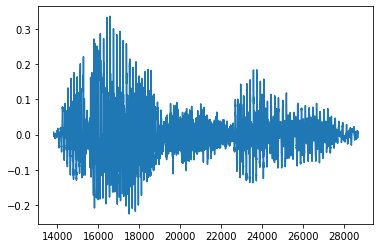

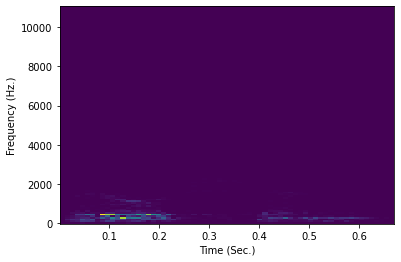

In [7]:
# Converting to spectrograms from wave form.
sound_array = ar[13824 : 28672]
display(Audio(sound_array, rate=sr))

x_array = [i for i in range(13824, 28672)]

plt.plot(x_array, sound_array)
plt.show()

# Now converting it to spectrogram
frequencies, times, spectrogram = signal.spectrogram(sound_array, sr)
plt.pcolormesh(times, frequencies, spectrogram)
# plt.imshow(spectrogram)
plt.ylabel('Frequency (Hz.)')
plt.xlabel('Time (Sec.)')
plt.show()


In [8]:
# Let's try to generate a new image from an image distribution and then apply it on speech. 


In [9]:
# Let's see how addition work in Numpy.

a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 3])

# Now we need to make all the arrays of same length.
# Let's do that here.
# length = 8

a_pad = np.pad(a, (0, 8 - len(a)))
print(a_pad)

b_pad = np.pad(b, (0, 8 - len(b)))
print(b_pad)

# Now let's add this.
c = a_pad + b_pad
print(c)


[1 2 3 4 0 0 0 0]
[1 2 3 0 0 0 0 0]
[2 4 6 4 0 0 0 0]
